## Principle Component Analysis 
We did principle Component Analysis of the Data Matrix from the Random Bits obtained from the Quantum Computers. 

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD


In [16]:
def singular_values_plot(file_name):
    df = pd.read_csv(f'{file_name}.txt', header=None)
    df.columns = ['data']
    data = [ [int(j) for j in list(i)] for i in df['data'].values]
    
    # scaler = StandardScaler()
    # scaled_data = scaler.fit_transform(data)
    
    svd = PCA(n_components=100)
    svd.fit(data)
    plt.scatter(range(svd.singular_values_.shape[0]), svd.singular_values_, s=2)
    plt.title(f'Principle values of the {file_name} data')
    plt.xlabel('qbit index')
    plt.ylabel('Principle value')
    
    # px.scatter(x=range(svd.singular_values_.shape[0]), y=svd.singular_values_, title=f'Principle values of the {file_name} data', labels={'x': 'qbit index', 'y': 'Principle value'}).show()
    print(f"Top 10 singular values: {svd.singular_values_[:10]}")
    

Top 10 singular values: [75.60477411 75.28443228 75.09973746 75.00853294 74.89972863 74.81275313
 74.61710469 74.40155714 74.28608829 74.23583585]


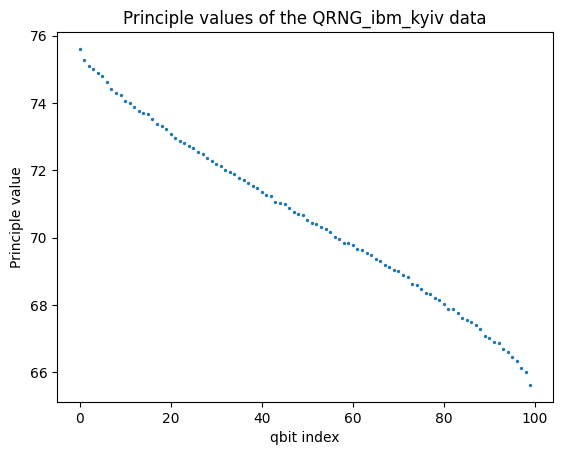

In [17]:
singular_values_plot('QRNG_ibm_kyiv') 

Top 10 singular values: [55.05144431 54.88007093 54.44768131 54.15545903 54.10902319 53.92949638
 53.77448554 53.64362187 53.62831646 53.43955595]


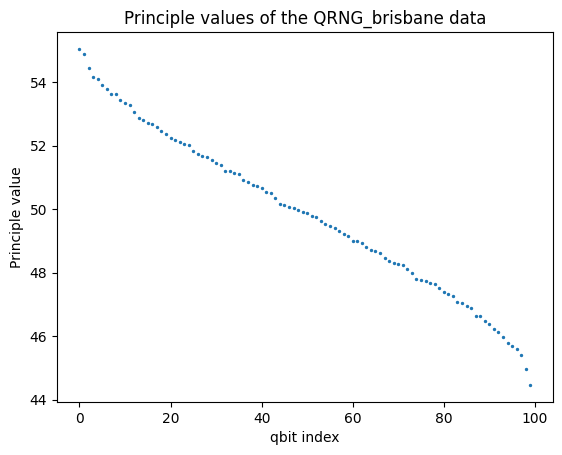

In [18]:
singular_values_plot('QRNG_brisbane') 

Top 10 singular values: [79.28621953 75.55123925 75.36641814 75.13192041 74.88353988 74.82293953
 74.63834904 74.45499755 74.29217499 74.17631174]


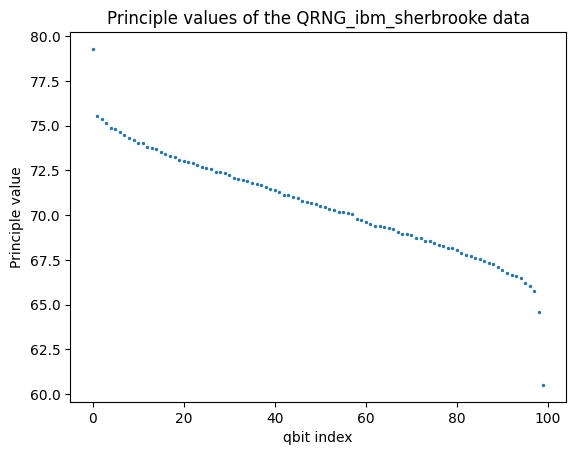

In [19]:
singular_values_plot('QRNG_ibm_sherbrooke')


# Fourier Transform
We did fast fourier transform to analyze the noise in the data matrix

In [134]:
df = pd.read_csv(f'QRNG_ibm_brisbane.txt', header=None)
df.columns = ['data']
data = np.array([ [int(j) for j in list(i)] for i in df['data'].values])
fft_res = np.fft.fft2(data)

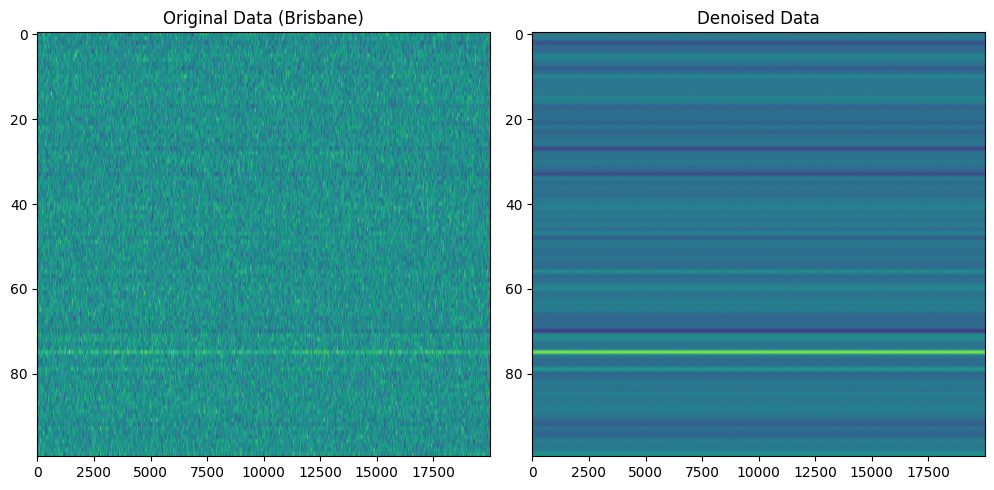

In [145]:
fft_result = np.fft.fft2(np.transpose(data))

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fft_result)
# Shift the zero frequency component to the center
magnitude_spectrum_shifted = np.fft.fftshift(magnitude_spectrum)

# Set a threshold value (you may need to adjust this based on your data)
threshold = np.mean(magnitude_spectrum) + 2 * np.std(magnitude_spectrum)

# Create a mask to filter out low-amplitude frequencies
mask = magnitude_spectrum > threshold

# Apply the mask to the FFT result
fft_filtered = fft_result * mask

denoised_data = np.fft.ifft2(fft_filtered).real

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(np.transpose(data), aspect='auto', cmap='viridis')
plt.title('Original Data (Brisbane)')


plt.subplot(132)
plt.imshow(denoised_data, aspect='auto', cmap='viridis')
plt.title('Denoised Data')

plt.tight_layout()
plt.show()

In [138]:
#extract the bright line
bright_line = np.sum(denoised_data, axis=1)
np.argmax(bright_line)

np.int64(75)

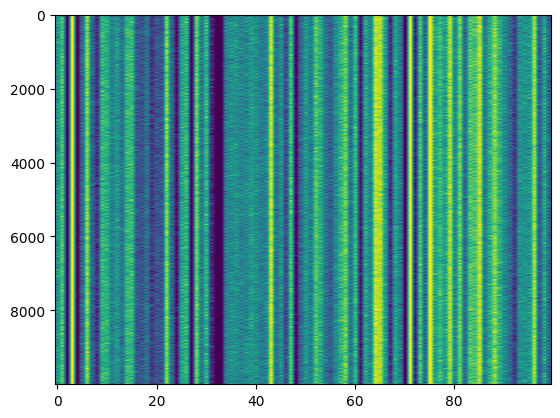

In [108]:
plt.imshow(np.transpose(denoised_data.round()), aspect='auto', cmap='viridis')

## Fidelity Calculation


In [44]:
df = pd.read_csv(f'QRNG_ibm_brisbane.txt', header=None)
df.columns = ['data']
data = np.array([ [int(j) for j in list(i)] for i in df['data'].values])

observed_state = np.transpose(data[0])
ideal_state = 0.1*np.ones(100).reshape(100, 1)
ideal_density = np.outer(ideal_state, ideal_state)
observed_density = np.outer(observed_state, observed_state)
sqrt_ideal_density = (ideal_density)


A = sqrt_ideal_density @ observed_density @ sqrt_ideal_density
egval, egvec = np.linalg.eigvals(A)


FileNotFoundError: [Errno 2] No such file or directory: 'QRNG_ibm_brisbane.txt'